# $\textit{Punto 3}$

In [1]:
# Librerías estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelado y preprocesamiento de datos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# Modelos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

# Métricas de evaluación
from sklearn.metrics import (mean_squared_error, r2_score, 
                             mean_absolute_percentage_error, 
                             mean_absolute_error, explained_variance_score, 
                             mean_squared_log_error)

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera

# Librerías adicionales
import plotly.express as px
from IPython.display import display
import mglearn

# Configuración de estilo para gráficos
sns.set_style("whitegrid")


In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/lihkir/Data/refs/heads/main/wind_speed/data_treino_dv_df_2000_2010.csv')

In [62]:
df.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


### $\textit{Ajuste de Datos y Variables} $

In [63]:
nuevos_nombres = [
    "Hora (UTC)",
    "Viento, Dirección Horaria (gr)",
    "target",
    "Humedad Rel. Máx. Hora Ant. (AUT) (%)",
    "Humedad Rel. Mín. Hora Ant. (AUT) (%)",
    "Temperatura Máx. Hora Ant. (AUT) (°C)",
    "Temperatura Mín. Hora Ant. (AUT) (°C)",
    "Humedad Relativa Horaria (%)",
    "Presión Atmosférica a Nivel de Estación Horaria (mB)",
    "Precipitación Total Horaria (mm)",
    "Viento, Ráfaga Máxima (m/s)",
    "Presión Atmosférica Máx. Hora Ant. (AUT) (mB)",
    "Presión Atmosférica Mín. Hora Ant. (AUT) (mB)"
]
df.columns = nuevos_nombres
df.head()

,Hora (UTC),"Viento, Dirección Horaria (gr)",target,Humedad Rel. Máx. Hora Ant. (AUT) (%),Humedad Rel. Mín. Hora Ant. (AUT) (%),Temperatura Máx. Hora Ant. (AUT) (°C),Temperatura Mín. Hora Ant. (AUT) (°C),Humedad Relativa Horaria (%),Presión Atmosférica a Nivel de Estación Horaria (mB),Precipitación Total Horaria (mm),"Viento, Ráfaga Máxima (m/s)",Presión Atmosférica Máx. Hora Ant. (AUT) (mB),Presión Atmosférica Mín. Hora Ant. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [64]:
df = df.drop('Hora (UTC)',axis='columns')
X_train = df.drop('target',axis='columns')[:-24]
y_train = df.target[:-24]
X_test  = df.drop('target',axis='columns')[-24:]
y_test  = df.target[-24:]

In [7]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True )
t_test  = y_test.reset_index(drop=True )

### $ \textit{Declaracion de funciones} $


In [65]:
from re import M
def grid_search_custom(*, X_train: pd.DataFrame, y_train: pd.Series, hour_test: int, T: int, type_model: str) -> Any:
    ##############################################################
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100],
                  'n_neighbors':[i for i in range(1,20)]}
    ##############################################################
    all_sub = len(X_train) // T
    block_size = T * hour_test
    best_score = float('inf')
    best_model = None
    last_index = 0

    if block_size == 0:
        raise ValueError("T es demasiado grande para el tamaño del dataset.")

    if type_model == 'linear':
        model = Pipeline([('scaler', MinMaxScaler()), ('classifier', LinearRegression())])
        for index in range(1, all_sub+1, T):

                  xtrain         = X_train.iloc[last_index:index * block_size]
                  ytrain         = y_train.iloc[last_index:index * block_size]
                  if len(xtrain) > 0 or len(ytrain) > 0:
                      model.fit(xtrain, ytrain)

                  last_index = index * block_size

    elif type_model == 'ridge':
          for Alpha in param_grid['alpha']:
              model = Pipeline([('scaler', MinMaxScaler()), ('classifier', Ridge(alpha = Alpha))])
              for index in range(1, all_sub+1, T):
                        xtrain         = X_train.iloc[last_index:index * block_size]
                        ytrain         = y_train.iloc[last_index:index * block_size]
                        if len(xtrain) > 0 or len(ytrain) > 0:
                            model.fit(xtrain, ytrain)
                            ypred          = model.predict(X_test)
                            rmse           = (y_test.iloc[hour_test-1] - ypred[hour_test-1])**2
                            if rmse < best_score:
                                best_score = rmse
                                best_model = model
                            last_index = index * block_size
          model =  best_model
    elif type_model == 'lasso':
          for Alpha in param_grid['alpha']:
              model = Pipeline([('scaler', MinMaxScaler()), ('classifier', Lasso(alpha = Alpha))])
              for index in range(1, all_sub+1, T):
                        xtrain         = X_train.iloc[last_index:index * block_size]
                        ytrain         = y_train.iloc[last_index:index * block_size]
                        if len(xtrain) > 0 or len(ytrain) > 0:
                            model.fit(xtrain, ytrain)
                            ypred          = model.predict(X_test)
                            rmse           = (y_test.iloc[hour_test-1] - ypred[hour_test-1])**2
                            if rmse < best_score:
                                best_score = rmse
                                best_model = model
                            last_index = index * block_size
          model =  best_model
    else:
        for n in param_grid['n_neighbors']:
            model = Pipeline([('scaler', MinMaxScaler()), ('classifier', KNeighborsRegressor(n_neighbors=n))])
            for index in range(1, all_sub+1, T):
                xtrain = X_train.iloc[last_index:index * block_size]
                ytrain = y_train.iloc[last_index:index * block_size]
                if len(xtrain) > 0 and len(ytrain) > 0:
                    model.fit(xtrain, ytrain)
                    ypred = model.predict(X_test)
                    rmse = (y_test.iloc[hour_test-1] - ypred[hour_test-1])**2
                    if rmse < best_score:
                        best_score = rmse
                        best_model = model
                last_index = index * block_size
        model = best_model
    return model

def best_window_calculator(*, X_train, y_train, type_model, hour_test, best_rmse = 1) -> List:
      results = []
      for T in [7, 14, 21, 28]:
            all_sub    = len(X_train) // T
            block_size = 24 * T
            last_index = 00
            sum_rmse   = 00
            for  index  in  range(1, all_sub + 1, T):
              try:
                  xtrain         = X_train.iloc[last_index:index * block_size]
                  xtest          = X_train.iloc[(index + hour_test - 1) * block_size:(index + hour_test) * block_size]
                  ytrain         = y_train.iloc[last_index:index * block_size]
                  ytest          = y_train.iloc[(index + hour_test - 1) * block_size:(index + hour_test) * block_size]
                  if len(xtrain) == 0 or len(xtest) == 0:                       continue
                  reg        =   Pipeline([('scaler', MinMaxScaler()), ('clasificator', type_model)])
                  reg.fit(xtrain, ytrain)
                  ypred      = reg.predict(xtest)
                  rmse       = np.sqrt(mean_squared_error(ytest, ypred))
                  sum_rmse   += rmse
                  last_index = index * block_size
              except ValueError as e :                                          continue
              except Exception as e  :                                          continue
            results.append(sum_rmse/all_sub)
      return results

def calcular_metricas(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    lb_test = acorr_ljungbox(y_true - y_pred, lags=[10], return_df=True)
    ljung_box_p_value = lb_test['lb_pvalue'].iloc[0]
    jb_test = jarque_bera(y_true - y_pred)
    jarque_bera_p_value = jb_test[1]

    return {
        'RMSE': [rmse],
        'MAPE': [mape],
        'R2': [r2],
        'Ljung-Box p-value': [ljung_box_p_value],
        'Jarque-Bera p-value': [jarque_bera_p_value]
    }

## $ \textit{Modelos} $


### $\textit{Linear Regressor}$

In [66]:
dx = {'ventana/hora predicha':[i for i in range(1,25)], '7':[], '14':[], '21':[], '28':[]}
for hour in range(1,25):
  results_lin = best_window_calculator(X_train = X_train, y_train = y_train, type_model = LinearRegression(), hour_test = hour)
  dx['7'].append(results_lin[0])
  dx['14'].append(results_lin[1])
  dx['21'].append(results_lin[2])
  dx['28'].append(results_lin[3])
df_metrics = pd.DataFrame(dx)
df_metrics.set_index('ventana/hora predicha', inplace=True)
min_rmse = 10000
best_window_lin = 0
for index, col in enumerate(df_metrics.columns):
  if np.mean(df_metrics[col]) < min_rmse:
    min_rmse = np.mean(df_metrics[col])
    best_window_lin = int(col)
display(df_metrics.head(25))
df_metrics.to_latex('windows_lin.tex')
print(f'\nLa mejor ventana para un modelo de regresión lineal es {best_window_lin} con un rmse medio de {min_rmse}')

,7,14,21,28
ventana/hora predicha,,,,
1,0.004287,0.001814,0.001304,0.000906
2,0.004866,0.001784,0.001332,0.000923
3,0.003978,0.001814,0.001244,0.000968
4,0.003550,0.001850,0.001363,0.001184
5,0.003742,0.001809,0.001284,0.001052
6,0.004383,0.001816,0.001125,0.002200
7,0.003680,0.001874,0.001196,0.001062
8,0.004164,0.002041,0.001254,0.001063
9,0.007062,0.001742,0.001217,0.001787



La mejor ventana para un modelo de regresión lineal es 28 con un rmse medio de 0.0010649895435420442


Se hizo la prueba para cada periodo y, teniendo en cuenta la metrica de decision RMSE, se obtuvo que el periodo con mejor metrica es de la venta de 21 dias para predecir el siguiente, RMSE( 0.00093 )

In [11]:
models = []
for hour in range(1,25):
        print('HOUR  TESTED : ', hour )
        lin_model = grid_search_custom(X_train = X_train, y_train = y_train, hour_test = hour, T = best_window_lin, type_model  = 'linear')
        models.append(lin_model)


HOUR  TESTED :  1
HOUR  TESTED :  2
HOUR  TESTED :  3
HOUR  TESTED :  4
HOUR  TESTED :  5
HOUR  TESTED :  6
HOUR  TESTED :  7
HOUR  TESTED :  8
HOUR  TESTED :  9
HOUR  TESTED :  10
HOUR  TESTED :  11
HOUR  TESTED :  12
HOUR  TESTED :  13
HOUR  TESTED :  14
HOUR  TESTED :  15
HOUR  TESTED :  16
HOUR  TESTED :  17
HOUR  TESTED :  18
HOUR  TESTED :  19
HOUR  TESTED :  20
HOUR  TESTED :  21
HOUR  TESTED :  22
HOUR  TESTED :  23
HOUR  TESTED :  24


Text(0, 0.5, 'Cuantiles Muestrales')

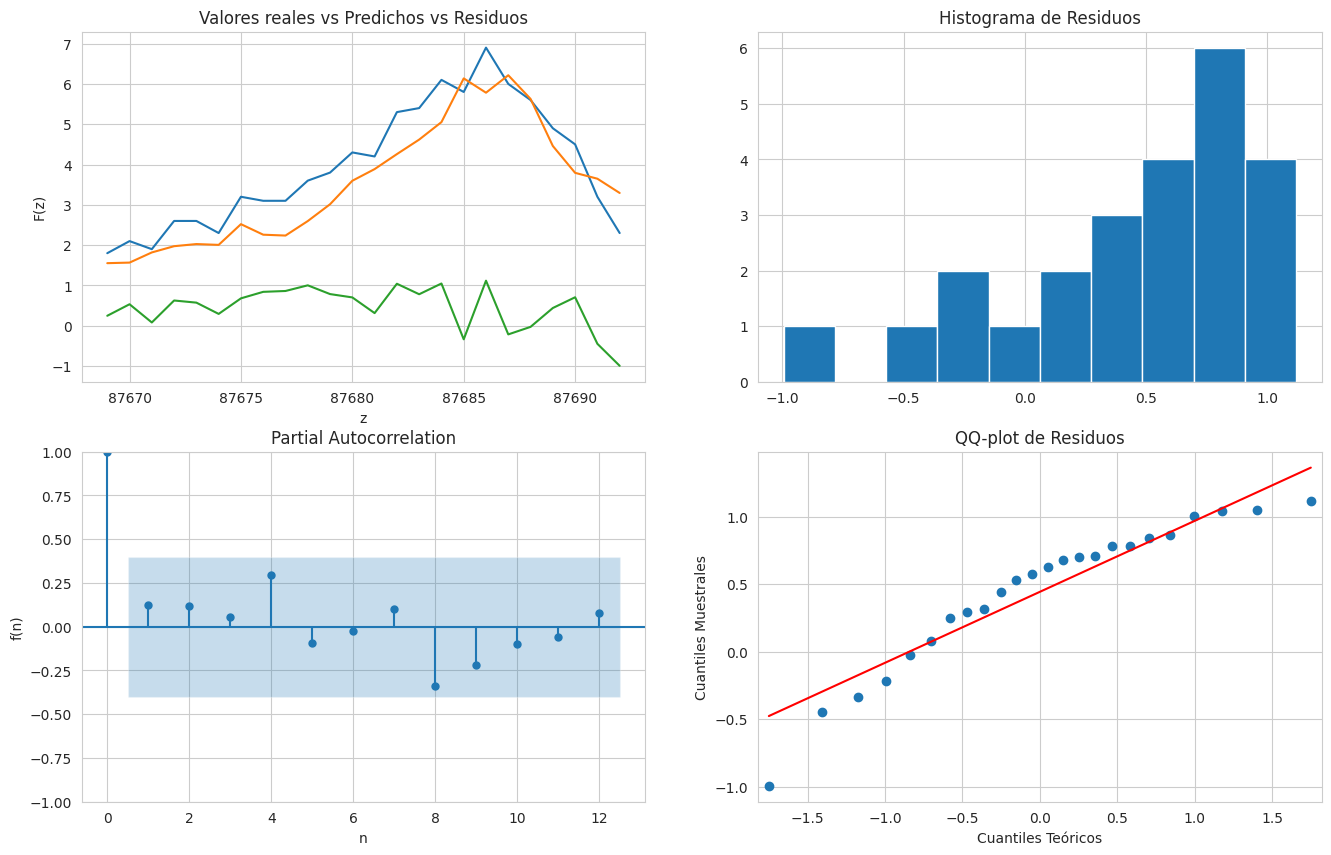

In [12]:
fig,ax=plt.subplots(2,2);fig.set_size_inches(16,10);
y1 = []; y2 = []
for i in range(24):
    y1.append(models[i].predict(X_test)[i])
    y2.append(y_test.iloc[i])
residuos_lineales = y_test - y1
data = pd.DataFrame({
    'Predicciones': y1,
    'Valores Reales': y2,
    'residuos': residuos_lineales
})

ax[0][0].set_title('Valores reales vs Predichos vs Residuos')
ax[0][0].plot(data[ 'Valores Reales'],'-')
ax[0][0].plot(data['Predicciones'],'-')
ax[0][0].plot(data['residuos'],'-')
ax[0][0].set_ylabel('F(z)')
ax[0][0].set_xlabel('z')

plot_pacf(residuos_lineales, lags=12, ax=ax[1][0])
ax[1][0].set_ylabel('f(n)')
ax[1][0].set_xlabel('n')

ax[0][1].set_title('Histograma de Residuos')
ax[0][1].hist(data['residuos'])

sm.qqplot(data['residuos'], line='s', ax=ax[1][1])
ax[1][1].set_title('QQ-plot de Residuos')
ax[1][1].set_xlabel('Cuantiles Teóricos')
ax[1][1].set_ylabel('Cuantiles Muestrales')


In [13]:
models_df = pd.DataFrame(calcular_metricas(y_test, y1))
models_df.to_latex('metrics_lin.tex')
display(models_df)

,RMSE,MAPE,R2,Ljung-Box p-value,Jarque-Bera p-value
0,0.688436,17.090203,0.785539,0.465402,0.136098


A partir de los resultados obtenidos, tanto gráficos como numéricos, podemos tomar una postura frente al desempeño del modelo. Al analizar la serie generada por la predicción, observamos una gran similitud con los valores reales de y_test, correspondientes a las últimas 24 horas de nuestros registros. Esto se traduce en residuos cercanos a 0 a lo largo de la línea de referencia.

En cuanto al comportamiento de la distribución de los datos, el histograma muestra un sesgo mientras que los valores en el gráfico QQ se encuentran alineados en su mayoría con la recta teórica, lo que indica una aproximación aceptable a la normalidad. Esto se ve reflejado en el p-valor del test de Jarque-Bera (0.136), que es mayor a 0.05, lo que sugiere que no podemos rechazar la hipótesis de normalidad en los residuos.

Finalizando con la parte gráfica, la autocorrelación parcial ofrece un buen indicio, ya que los valores de los lags se encuentran dentro de las bandas de confianza, lo que sugiere que no hay autocorrelación significativa en los residuos. El test de Ljung-Box respalda este análisis, con un p-valor de 0.465, indicando que no hay evidencia estadística de autocorrelación en los residuos.

En lo referente a las métricas numéricas, obtenemos una visión más específica del rendimiento del modelo. El valor de RMSE (0.688), cercano a 0, indica un bajo error de predicción. El MAPE (error porcentual absoluto medio) es relativamente bajo (17.09), lo que es aceptable en este contexto. Finalmente, el coeficiente de determinación R² (0.785) muestra que el modelo explica una proporción suficiente de la variabilidad de los datos, captando bien el comportamiento de la serie.

## $\textit{Knn Regressor}$

In [14]:
dx = {'ventana/hora predicha':[i for i in range(1,25)], '7':[], '14':[],'21':[],'28':[]}

for hour in range(1,25):
  results_knn = best_window_calculator(X_train = X_train, y_train = y_train, hour_test =  hour, type_model = KNeighborsRegressor())
  dx['7'].append(results_knn[0])
  dx['14'].append(results_knn[1])
  dx['21'].append(results_knn[2])
  dx['28'].append(results_knn[3])
df_metrics = pd.DataFrame(dx)
df_metrics.set_index('ventana/hora predicha', inplace=True)
min_rmse = 10000
best_window_knn = 0
for index, col in enumerate(df_metrics.columns):
  if np.mean(df_metrics[col]) < min_rmse:
    min_rmse = np.mean(df_metrics[col])
    best_window_knn = int(col)
display(df_metrics.head(25))
print(f'la mejor ventana es {best_window_knn} con un rmse medio de :{str(min_rmse)[:7]}')

,7,14,21,28
ventana/hora predicha,,,,
1,0.004743,0.002211,0.001476,0.001108
2,0.004900,0.002267,0.001646,0.001093
3,0.004861,0.002367,0.001544,0.001167
4,0.005001,0.002438,0.001617,0.001301
5,0.005093,0.002538,0.001618,0.001310
6,0.005121,0.002466,0.001387,0.001501
7,0.005161,0.002484,0.001368,0.001279
8,0.005448,0.002519,0.001591,0.001339
9,0.005620,0.002366,0.001483,0.001302


la mejor ventana es 28 con un rmse medio de :0.00119


En este caso, calculamos la mejor ventana para aplicar el método de rolling utilizando un modelo KNN sin hiperparametrización. Posteriormente, empleamos esta ventana para seleccionar los mejores hiperparámetros del modelo.

In [28]:
models_knn = []
for hour in range(1,25):
        print('HOUR  TESTED : ',hour)
        knn = grid_search_custom(X_train = X_train, y_train = y_train, hour_test = hour, T = best_window_knn, type_model = 'knn')
        models_knn.append(knn)

HOUR  TESTED :  1
HOUR  TESTED :  2
HOUR  TESTED :  3
HOUR  TESTED :  4
HOUR  TESTED :  5
HOUR  TESTED :  6
HOUR  TESTED :  7
HOUR  TESTED :  8
HOUR  TESTED :  9
HOUR  TESTED :  10
HOUR  TESTED :  11
HOUR  TESTED :  12
HOUR  TESTED :  13
HOUR  TESTED :  14
HOUR  TESTED :  15
HOUR  TESTED :  16
HOUR  TESTED :  17
HOUR  TESTED :  18
HOUR  TESTED :  19
HOUR  TESTED :  20
HOUR  TESTED :  21
HOUR  TESTED :  22
HOUR  TESTED :  23
HOUR  TESTED :  24


Text(0, 0.5, 'Cuantiles Muestrales')

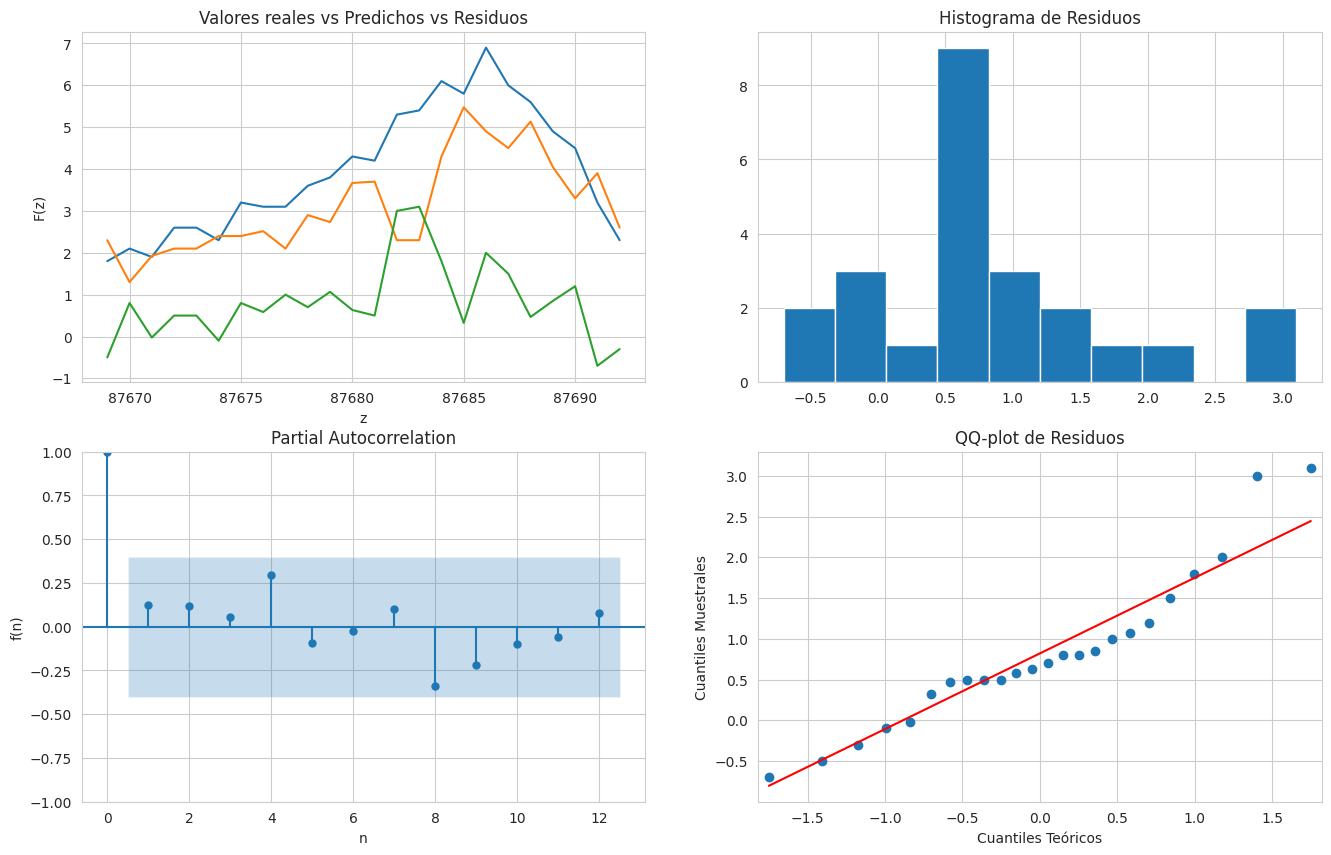

In [29]:
fig,ax=plt.subplots(2,2);fig.set_size_inches(16,10);
y1 = []; y2 = []
for i in range(24):
    y1.append(models_knn[i].predict(X_test)[i])
    y2.append(y_test.iloc[i])
residuos_knn = y_test - y1
data = pd.DataFrame({
    'Predicciones': y1,
    'Valores Reales': y2,
    'residuos': residuos_knn
})

ax[0][0].set_title('Valores reales vs Predichos vs Residuos')
ax[0][0].plot(data[ 'Valores Reales'],'-')
ax[0][0].plot(data['Predicciones'],'-')
ax[0][0].plot(data['residuos'],'-')
ax[0][0].set_ylabel('F(z)')
ax[0][0].set_xlabel('z')

plot_pacf(residuos_lineales, lags=12, ax=ax[1][0])
ax[1][0].set_ylabel('f(n)')
ax[1][0].set_xlabel('n')


ax[0][1].set_title('Histograma de Residuos')
ax[0][1].hist(data['residuos'])


sm.qqplot(data['residuos'], line='s', ax=ax[1][1])
ax[1][1].set_title('QQ-plot de Residuos')
ax[1][1].set_xlabel('Cuantiles Teóricos')
ax[1][1].set_ylabel('Cuantiles Muestrales')

In [35]:
rmses = []
mapes = []
r2s = []
lj = []
jb = []
for model in models_knn:
    rmses.append((calcular_metricas(y_test, model.predict(X_test)))['RMSE'][0])
    mapes.append(calcular_metricas(y_test, model.predict(X_test))['MAPE'][0])
    r2s.append(calcular_metricas(y_test, model.predict(X_test))['R2'][0])
    lj.append(calcular_metricas(y_test, model.predict(X_test))['Ljung-Box p-value'][0])
    jb.append(calcular_metricas(y_test, model.predict(X_test))['Jarque-Bera p-value'][0])

In [40]:
models_df = pd.DataFrame({'RMSE':[np.mean(rmses)], 'MAPE':[np.mean(mapes)],	'R2':[np.mean(r2s)], 	'Ljung-Box p-value':[np.mean(lj)], 'Jarque-Bera p-value':[np.mean(jb)]})
models_df.to_latex('metrics_lin.tex')
display(models_df)

,RMSE,MAPE,R2,Ljung-Box p-value,Jarque-Bera p-value
0,1.085487,21.414058,0.457971,0.039761,0.461186


A partir de los resultados obtenidos, tanto gráficos como numéricos, podemos tomar una postura frente al desempeño del modelo. Al analizar la serie generada por la predicción, observamos valores distantes de los reales en algunas ocasiones.

En cuanto al comportamiento de la distribución de los datos, el histograma muestra un sesgo mientras que los valores en el gráfico QQ se encuentran alineados en su mayoría con la recta teórica, lo que indica una aproximación aceptable a la normalidad. Esto se ve reflejado en el p-valor del test de Jarque-Bera (0.461), que es mayor a 0.05, lo que sugiere que no podemos rechazar la hipótesis de normalidad en los residuos.

Finalizando con la parte gráfica, la autocorrelación parcial ofrece un buen indicio, ya que los valores de los lags se encuentran dentro de las bandas de confianza, lo que sugiere que no hay autocorrelación significativa en los residuos. El test de Ljung-Box respalda este análisis, con un p-valor(0.0397), indicando que no hay evidencia estadística de autocorrelación en los residuos.

En lo referente a las métricas numéricas, obtenemos una visión más específica del rendimiento del modelo. El valor de RMSE (1.085), cercano a 0, indica un bajo error de predicción. El MAPE (error porcentual absoluto medio) es relativamente bajo (21.41), lo que es aceptable en este contexto. Finalmente, el coeficiente de determinación R² (0.457) muestra que el modelo NO explica una proporción suficiente de la variabilidad de los datos.

## $\textit{Ridge}$


In [18]:
dx = {'ventana/hora predicha':[i for i in range(1,25)], '7':[], '14':[],'21':[],'28':[]}
for hour in range(1,25):
  results_ridge = best_window_calculator(X_train = X_train, y_train = y_train, hour_test =  hour, type_model = Ridge())
  dx['7'].append(results_ridge[0])
  dx['14'].append(results_ridge[1])
  dx['21'].append(results_ridge[2])
  dx['28'].append(results_ridge[3])
df_metrics = pd.DataFrame(dx)
df_metrics.set_index('ventana/hora predicha', inplace=True)
min_rmse = 10000
best_window_ridge = 0
for index, col in enumerate(df_metrics.columns):
  if np.mean(df_metrics[col]) < min_rmse:
    min_rmse = np.mean(df_metrics[col])
    best_window_ridge = int(col)
display(df_metrics.head(25))
print(f'la mejor ventana es {best_window_ridge} con un rmse medio de :{str(min_rmse)[:7]}')

,7,14,21,28
ventana/hora predicha,,,,
1,0.003962,0.001806,0.001309,0.000921
2,0.004094,0.001796,0.001334,0.000925
3,0.003777,0.001830,0.001245,0.000981
4,0.003589,0.001851,0.001324,0.001113
5,0.003700,0.001819,0.001294,0.001023
6,0.004008,0.001824,0.001134,0.001830
7,0.003759,0.001885,0.001182,0.001037
8,0.004016,0.001967,0.001242,0.001037
9,0.005199,0.001726,0.001192,0.001495


la mejor ventana es 28 con un rmse medio de :0.00102


In [50]:
models_ridge = []
for hour in range(1,25):
        print('HOUR  TESTED : ',hour)
        ridge = grid_search_custom(X_train = X_train, y_train = y_train, hour_test = hour, T = best_window_ridge, type_model = 'ridge')
        models_ridge.append(ridge)

HOUR  TESTED :  1
HOUR  TESTED :  2
HOUR  TESTED :  3
HOUR  TESTED :  4
HOUR  TESTED :  5
HOUR  TESTED :  6
HOUR  TESTED :  7
HOUR  TESTED :  8
HOUR  TESTED :  9
HOUR  TESTED :  10
HOUR  TESTED :  11
HOUR  TESTED :  12
HOUR  TESTED :  13
HOUR  TESTED :  14
HOUR  TESTED :  15
HOUR  TESTED :  16
HOUR  TESTED :  17
HOUR  TESTED :  18
HOUR  TESTED :  19
HOUR  TESTED :  20
HOUR  TESTED :  21
HOUR  TESTED :  22
HOUR  TESTED :  23
HOUR  TESTED :  24


Text(0, 0.5, 'Cuantiles Muestrales')

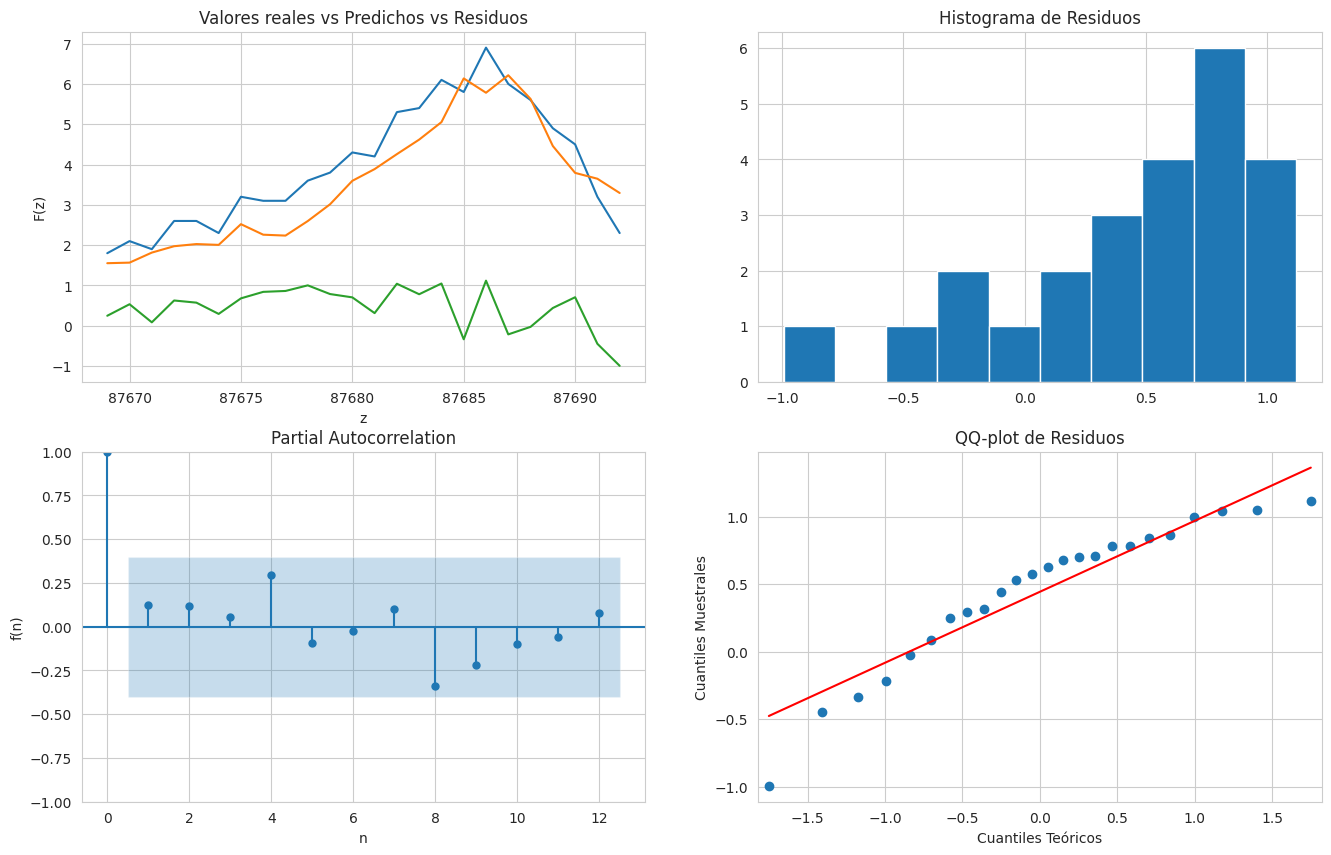

In [51]:
fig,ax=plt.subplots(2,2);fig.set_size_inches(16,10);
y1 = []; y2 = []
for i in range(24):
    y1.append(models_ridge[i].predict(X_test)[i])
    y2.append(y_test.iloc[i])
residuos_ridge = y_test - y1
data = pd.DataFrame({
    'Predicciones': y1,
    'Valores Reales': y2,
    'residuos': residuos_ridge
})

ax[0][0].set_title('Valores reales vs Predichos vs Residuos')
ax[0][0].plot(data[ 'Valores Reales'],'-')
ax[0][0].plot(data['Predicciones'],'-')
ax[0][0].plot(data['residuos'],'-')
ax[0][0].set_ylabel('F(z)')
ax[0][0].set_xlabel('z')

plot_pacf(residuos_lineales, lags=12, ax=ax[1][0])
ax[1][0].set_ylabel('f(n)')
ax[1][0].set_xlabel('n')


ax[0][1].set_title('Histograma de Residuos')
ax[0][1].hist(data['residuos'])


sm.qqplot(data['residuos'], line='s', ax=ax[1][1])
ax[1][1].set_title('QQ-plot de Residuos')
ax[1][1].set_xlabel('Cuantiles Teóricos')
ax[1][1].set_ylabel('Cuantiles Muestrales')

In [52]:
rmses = []
mapes = []
r2s = []
lj = []
jb = []
for model in models_ridge:
    rmses.append((calcular_metricas(y_test, model.predict(X_test)))['RMSE'][0])
    mapes.append(calcular_metricas(y_test, model.predict(X_test))['MAPE'][0])
    r2s.append(calcular_metricas(y_test, model.predict(X_test))['R2'][0])
    lj.append(calcular_metricas(y_test, model.predict(X_test))['Ljung-Box p-value'][0])
    jb.append(calcular_metricas(y_test, model.predict(X_test))['Jarque-Bera p-value'][0])

In [53]:
models_df = pd.DataFrame({'RMSE':[np.mean(rmses)], 'MAPE':[np.mean(mapes)],	'R2':[np.mean(r2s)], 	'Ljung-Box p-value':[np.mean(lj)], 'Jarque-Bera p-value':[np.mean(jb)]})
models_df.to_latex('metrics_lin.tex')
display(models_df)

,RMSE,MAPE,R2,Ljung-Box p-value,Jarque-Bera p-value
0,0.678972,16.943834,0.789952,0.408244,0.058905


Los resultados obtenidos, tanto gráficos como numéricos, podemos tomar una postura crítica respecto al desempeño del modelo. Al analizar la serie generada por la predicción, observamos algunas desviaciones notables en ciertos puntos, lo cual indica que el modelo no sigue perfectamente los valores reales en todo momento.

En cuanto al comportamiento de la distribución de los residuos, el histograma muestra un leve sesgo, lo cual sugiere que los residuos no son completamente simétricos. Sin embargo, el gráfico QQ indica que la mayoría de los valores siguen una alineación razonable con la recta teórica, lo que sugiere una aproximación aceptable a la normalidad. Este comportamiento se refleja también en el test de Jarque-Bera, cuyo p-valor (0.0589) es mayor a 0.05. Esto implica que no podemos rechazar la hipótesis nula de normalidad en los residuos, lo cual es positivo.

La autocorrelación parcial también muestra un comportamiento favorable, ya que los valores de los rezagos (lags) caen dentro de las bandas de confianza, sugiriendo que no hay autocorrelación significativa en los residuos. Esto se confirma con el test de Ljung-Box, cuyo p-valor (0.0408) también sugiere que no hay evidencia suficiente para concluir que existe autocorrelación en los residuos.

En lo que respecta a las métricas numéricas, se obtiene una visión más específica del rendimiento del modelo. El RMSE (0.678) es relativamente bajo, lo que sugiere un error moderado en las predicciones. El MAPE (16.94) indica que, en promedio, los errores absolutos son del 16.94%, lo cual es aceptable en muchos contextos de predicción. Por otro lado, el coeficiente de determinación R² (0.789) muestra que el modelo explica una proporción considerable de la variabilidad en los datos, lo cual es una mejora con respecto al análisis previo, sugiriendo un ajuste razonable del modelo a los datos.

En resumen, el modelo parece ser bastante adecuado, con métricas y pruebas que no presentan grandes indicios de problemas significativos en los residuos o autocorrelaciones, aunque aún podría haber margen de mejora en el ajuste global y en la reducción de error en puntos específicos.

## $\textit{Lasso}$

In [55]:
dx = {'ventana/hora predicha':[i for i in range(1,25)], '7':[], '14':[],'21':[],'28':[]}
for hour in range(1,25):
  results_lasso = best_window_calculator(X_train = X_train, y_train = y_train, hour_test =  hour, type_model = Lasso())
  dx['7'].append(results_lasso[0])
  dx['14'].append(results_lasso[1])
  dx['21'].append(results_lasso[2])
  dx['28'].append(results_lasso[3])
df_metrics = pd.DataFrame(dx)
df_metrics.set_index('ventana/hora predicha', inplace=True)
min_rmse = 10000
best_window_lasso = 0
for index, col in enumerate(df_metrics.columns):
  if np.mean(df_metrics[col]) < min_rmse:
    min_rmse = np.mean(df_metrics[col])
    best_window_lasso = int(col)
display(df_metrics.head(25))
print(f'la mejor ventana es {best_window_lasso} con un rmse medio de :{str(min_rmse)[:7]}')

,7,14,21,28
ventana/hora predicha,,,,
1,0.007755,0.004104,0.002779,0.002057
2,0.007825,0.003993,0.002865,0.002031
3,0.007897,0.004067,0.002751,0.002129
4,0.007850,0.003903,0.002837,0.002462
5,0.007667,0.003904,0.002844,0.002167
6,0.007805,0.003947,0.002567,0.002107
7,0.007764,0.003951,0.002487,0.002059
8,0.007897,0.004136,0.002581,0.002081
9,0.007924,0.004040,0.002524,0.002046


la mejor ventana es 28 con un rmse medio de :0.00199


In [57]:
models_lasso = []
for hour in range(1,25):
        print('HOUR  TESTED : ',hour)
        lasso = grid_search_custom(X_train = X_train, y_train = y_train, hour_test = hour, T = best_window_lasso, type_model = 'lasso')
        models_lasso.append(lasso)

HOUR  TESTED :  1
HOUR  TESTED :  2
HOUR  TESTED :  3
HOUR  TESTED :  4
HOUR  TESTED :  5
HOUR  TESTED :  6
HOUR  TESTED :  7
HOUR  TESTED :  8
HOUR  TESTED :  9
HOUR  TESTED :  10
HOUR  TESTED :  11
HOUR  TESTED :  12
HOUR  TESTED :  13
HOUR  TESTED :  14
HOUR  TESTED :  15
HOUR  TESTED :  16
HOUR  TESTED :  17
HOUR  TESTED :  18
HOUR  TESTED :  19
HOUR  TESTED :  20
HOUR  TESTED :  21
HOUR  TESTED :  22
HOUR  TESTED :  23
HOUR  TESTED :  24


Text(0, 0.5, 'Cuantiles Muestrales')

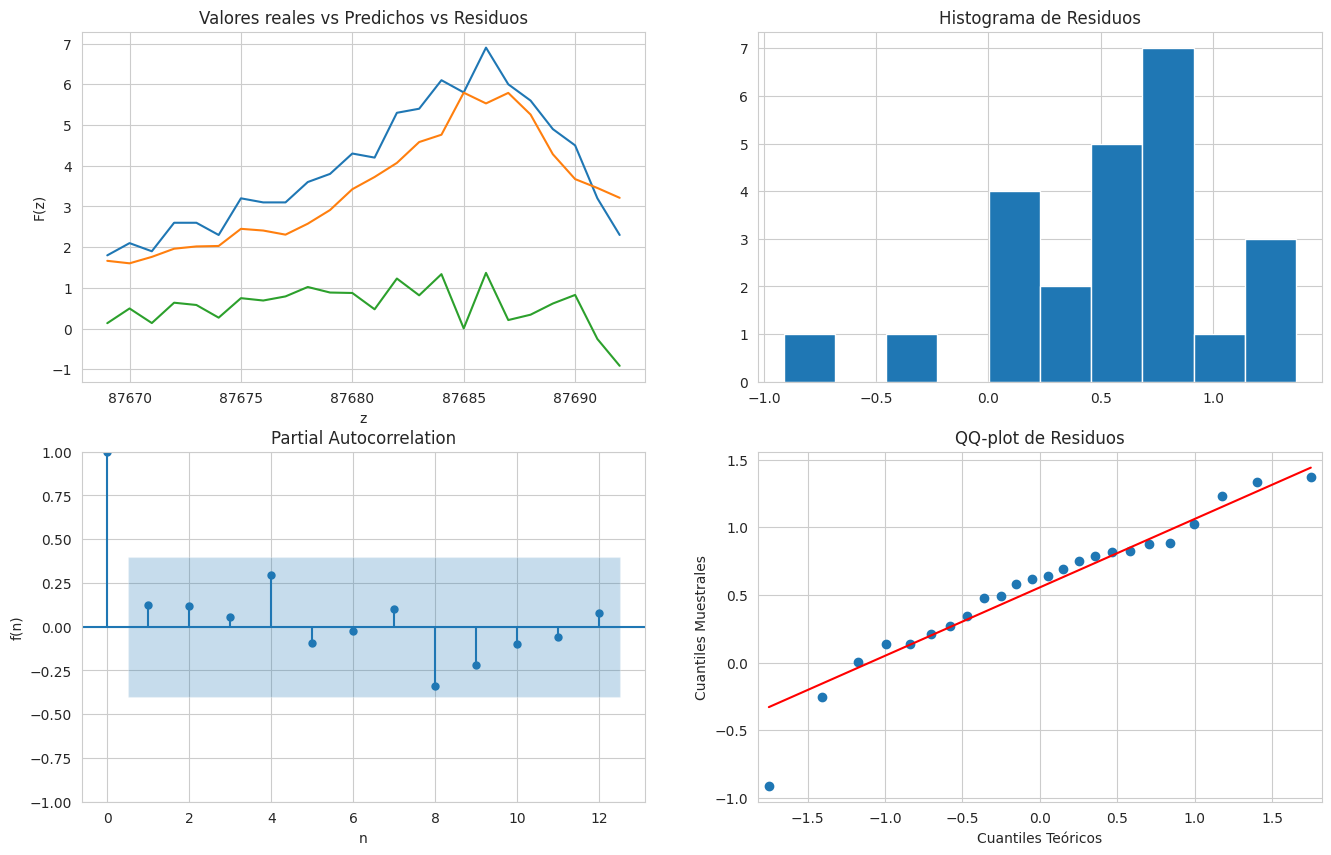

In [58]:
fig,ax=plt.subplots(2,2);fig.set_size_inches(16,10);
y1 = []; y2 = []
for i in range(24):
    y1.append(models_lasso[i].predict(X_test)[i])
    y2.append(y_test.iloc[i])
residuos_lasso = y_test - y1
data = pd.DataFrame({
    'Predicciones': y1,
    'Valores Reales': y2,
    'residuos': residuos_lasso
})

ax[0][0].set_title('Valores reales vs Predichos vs Residuos')
ax[0][0].plot(data[ 'Valores Reales'],'-')
ax[0][0].plot(data['Predicciones'],'-')
ax[0][0].plot(data['residuos'],'-')
ax[0][0].set_ylabel('F(z)')
ax[0][0].set_xlabel('z')

plot_pacf(residuos_lineales, lags=12, ax=ax[1][0])
ax[1][0].set_ylabel('f(n)')
ax[1][0].set_xlabel('n')


ax[0][1].set_title('Histograma de Residuos')
ax[0][1].hist(data['residuos'])


sm.qqplot(data['residuos'], line='s', ax=ax[1][1])
ax[1][1].set_title('QQ-plot de Residuos')
ax[1][1].set_xlabel('Cuantiles Teóricos')
ax[1][1].set_ylabel('Cuantiles Muestrales')

In [60]:
rmses = []
mapes = []
r2s = []
lj = []
jb = []
for model in models_lasso:
    rmses.append((calcular_metricas(y_test, model.predict(X_test)))['RMSE'][0])
    mapes.append(calcular_metricas(y_test, model.predict(X_test))['MAPE'][0])
    r2s.append(calcular_metricas(y_test, model.predict(X_test))['R2'][0])
    lj.append(calcular_metricas(y_test, model.predict(X_test))['Ljung-Box p-value'][0])
    jb.append(calcular_metricas(y_test, model.predict(X_test))['Jarque-Bera p-value'][0])
models_df = pd.DataFrame({'RMSE':[np.mean(rmses)], 'MAPE':[np.mean(mapes)],	'R2':[np.mean(r2s)], 	'Ljung-Box p-value':[np.mean(lj)], 'Jarque-Bera p-value':[np.mean(jb)]})
models_df.to_latex('metrics_lin.tex')
display(models_df)

,RMSE,MAPE,R2,Ljung-Box p-value,Jarque-Bera p-value
0,0.768792,18.19224,0.730872,0.346395,0.072361


 podemos analizar el desempeño del modelo desde varias perspectivas. Gráficamente, observamos que la serie de predicciones (línea naranja) sigue una tendencia similar a los valores reales (línea azul), aunque con algunas desviaciones. Los residuos (línea verde) muestran fluctuaciones relativamente controladas alrededor de cero, lo que indica un comportamiento adecuado del modelo. El histograma de residuos presenta un ligero sesgo hacia valores positivos, pero sigue una distribución que no muestra indicios graves de problemas. El QQ-plot muestra una alineación razonable con la línea de referencia, sugiriendo que los residuos se aproximan a una distribución normal, aunque no de forma perfecta.

El gráfico de autocorrelación parcial indica que no existe una autocorrelación significativa en los residuos, ya que los lags están mayoritariamente dentro de las bandas de confianza. El test de Ljung-Box con un p-valor de 0.346 refuerza esta conclusión, indicando que no hay evidencia estadística suficiente para afirmar que los residuos estén autocorrelacionados.

En términos de métricas numéricas, el RMSE (0.768) es relativamente bajo, lo que indica un error moderado de predicción. El MAPE de 18.19% sugiere que, en promedio, los errores absolutos son relativamente bajos. El coeficiente de determinación R² (0.731) muestra que el modelo explica una buena proporción de la variabilidad de los datos, lo cual es positivo. Finalmente, el p-valor del test de Jarque-Bera (0.072) es ligeramente superior al umbral del 0.05, lo que sugiere que no podemos rechazar completamente la hipótesis de normalidad de los residuos, aunque esto podría mejorar con ajustes adicionales al modelo.

En resumen, el modelo parece tener un rendimiento aceptable, con métricas que indican un buen ajuste y residuos que no presentan problemas importantes, aunque aún podría beneficiarse de una mejora en ciertos aspectos.